In [7]:
# KNN test
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from utils import accuracy_score
from knn import KNN

test_size = 0.2
seed = 1234
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
knn = KNN(k=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9666666666666667


mean squarred error is 305.7719958301902


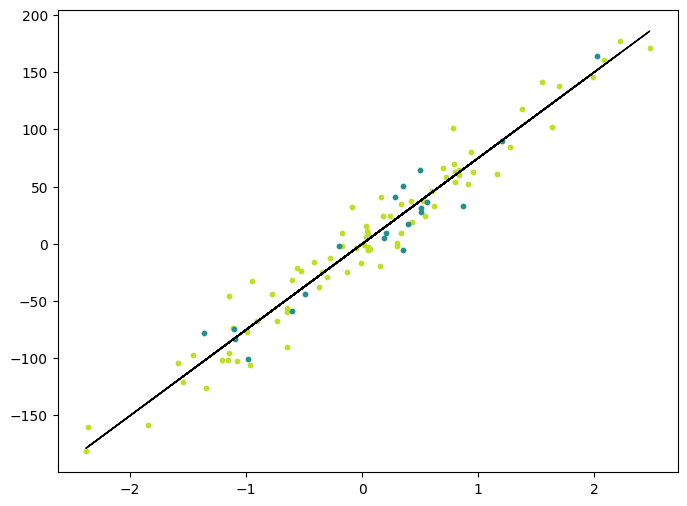

In [8]:
# Linear Regression test
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from linear_regression import LinearRegression
from utils import mse

X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

regressor = LinearRegression(lr=.01)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
mse_value = mse(y_test, predictions)
print(f'mean squarred error is {mse_value}')

fig = plt.figure(figsize=(8, 6))
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=1, label='Prediction')
plt.show()

In [9]:
# Logistic Regression test
from sklearn.datasets import load_breast_cancer
from logistic_regression import LogisticRegression

dataset = load_breast_cancer()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
classifier = LogisticRegression(lr=0.0001, n_iters=1000)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9298245614035088
